## NLP Midterm Assignment

In [2]:
import spacy
import os
from collections import Counter, defaultdict
import pandas as pd
import matplotlib as plt
import seaborn as sns

### 1.1 Introduction

### 1.2 Data Preprocessing

In [61]:
df = pd.read_csv('datasets/guardian_dataset_cleaned.csv', index_col=[0])
df = df.dropna()

In [5]:
df.head()

,headline,body,date
0,The sure way to end the war,Mr Winston Churchill at the London Opera House...,1914-09-12
1,The Election and After,The election which takes place to-day will dec...,1918-12-14
2,Italy in Fascist control,"At the moment when Mussolini, the leader of th...",1922-10-30
3,Bavarian monarchist rising broken,The German reactionaries have struck and faile...,1923-11-10
4,Emergency regulations,"The first day of the strike passed off, in a s...",1926-05-06


In [62]:
df.describe()

,headline,body,date
count,22657,22657,22657
unique,21254,22577,6926
top,Diary,The undeclared race to succeed Paddy Ashdown a...,2005-04-04
freq,567,3,173


In [21]:
df2 = df.copy()
df2['year'] = pd.DatetimeIndex(df2['date']).year

In [36]:
df2['decade'] = df2['year'] - df2['year']%10

In [22]:
df2.groupby(['year']).count()

,headline,body,date
year,,,
1914,1,1,1
1918,1,1,1
1922,1,1,1
1923,1,1,1
1926,1,1,1
...,...,...,...
2018,645,645,645
2019,834,834,834
2020,278,278,278


<Figure size 432x288 with 0 Axes>

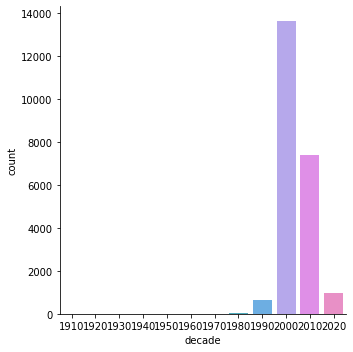

In [37]:
plt.pyplot.figure()
sns.catplot(x='decade', kind='count', data=df2)

In [51]:
df2[df2['year'] < 1990]

51

In [15]:
len(list(df['headline']))

22687

In [66]:
document_headlines = df['headline'].to_list()
document_body = df['body'].to_list()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22657 entries, 0 to 22686
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  22657 non-null  object
 1   body      22657 non-null  object
 2   date      22657 non-null  object
dtypes: object(3)
memory usage: 708.0+ KB


In [41]:
nlp = spacy.load('en_core_web_sm')

In [70]:
raw_docs = [[token.text for token in nlp(doc, disable = ['parser', 'ner'])] for doc in document_headlines]

In [71]:
docs_body_token = [[token.text for token in nlp(doc, disable = ['parser', 'ner'])] 
                    for doc in document_body]

In [75]:
docs_body_preprocess = [[token.lemma_ for token in nlp(doc, disable = ['parser', 'ner'])
                    if token.is_alpha
                    and not token.is_stop
                    and len(token.text) > 2]
                    for doc in document_body]

In [79]:
df['body_token'] = docs_body_token
df['body_pproc'] = docs_body_preprocess

In [82]:
# df.to_csv('guardian_data_pprocessed.csv')

In [89]:
token_count_raw = sum([len(doc) for doc in docs_body_token])
token_count_preprocessed = sum([len(doc) for doc in docs_body_preprocess])
types_count_raw = len(set([w for doc in docs_body_token for w in doc]))
types_count_preprocessed = len(set([w for doc in docs_body_preprocess for w in doc]))

In [92]:
pd.DataFrame([[token_count_raw, types_count_raw], [token_count_preprocessed,types_count_preprocessed]],
            columns = ['Tokens', 'Types'], index=['Raw', 'Pre-processed'])

,Tokens,Types
Raw,35347120,154064
Pre-processed,14347614,109985


In [66]:
df = pd.read_csv('datasets/guardian_data_pprocessed.csv', index_col=[0])

In [69]:
df = df.dropna().reset_index(drop=True)

In [57]:
data_pproc = df['body_pproc']
data_pproc.reset_index(drop = True, inplace=True)

data_raw = df['body_token']
data_raw.reset_index(drop = True, inplace=True)

In [58]:
for i in range(len(data_pproc)):
    try:
        data_pproc[i] = data_pproc[i][1:-1].replace("'", '').split(', ')
    except Exception:
        continue

In [59]:
for i in range(len(data_raw)):
    try:
        data_raw[i] = data_raw[i][1:-1].replace("'", '').split(', ')
    except Exception:
        continue

In [70]:
df['data_raw'] = data_raw

In [83]:
df['body_token'] = data_raw

In [84]:
df['body_pproc'] = data_pproc

In [89]:
df = df.iloc[:,:-1]

In [93]:
# df.to_pickle('guardian_dataset_pickle.p')

In [96]:
df2 = pd.read_pickle('datasets/guardian_dataset_pickle.p')

### Word2Vec

In [11]:
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.word2vec import FAST_VERSION

In [15]:
w2v = Word2Vec(vector_size=100, # vector size
               window=10, # window for sampling
               sample=0.001, # subsampling rate
               epochs=200, # iterations
               negative=5, # negative samples
               min_count=10, # minimum threshold
               workers=-1, # parallelize to all cores
               hs=0, # no hierarchical softmax
               seed=0)

In [16]:
corpus = [i for i in df_preprocessed]

In [20]:
len(corpus)

22657

In [22]:
df_preprocessed[0]

"['Winston', 'Churchill', 'London', 'Opera', 'House', 'tonight', 'sound', 'stir', 'people', 'country', 'army', 'shield', 'successful', 'navy', 'enable', 'end', 'war', 'way', 'hope', 'intend', 'shall', 'end', 'packed', 'enthusiastic', 'gathering', 'address', 'bring', 'invitation', 'National', 'Liberal', 'Club', 'Constitutional', 'Club', 'act', 'audience', 'speaker', 'representative', 'party', 'creed', 'class', 'hour', 'speaking', 'begin', 'seat', 'theatre', 'fill', 'thousand', 'people', 'unable', 'door', 'direct', 'overflow', 'meeting', 'Kingsway', 'Hall', 'Marquis', 'Lincolnshire', 'preside', 'say', 'great', 'crisis', 'political', 'sword', 'return', 'scabbard', 'invitation', 'lead', 'political', 'club', 'Metropolis', 'inhabitant', 'Greater', 'London', 'representative', 'class', 'express', 'admiration', 'gallant', 'troop', 'brave', 'ally', 'pledge', 'reinforce', 'Cheers', 'Winston', 'Churchill', 'receive', 'loud', 'cheer', 'move', 'meeting', 'citizen', 'London', 'profoundly', 'believe',